In [101]:
import networkx as nx
import glob
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [102]:
G = nx.Graph()

In [103]:
dr1 = 'dfs_sequence/*-1.txt'
dr2 = 'dfs_sequence/*-2.txt'

In [143]:
def getGraphsAndNames(directory):
    graphs = []
    filenames = []
    
    for file in sorted(glob.glob(directory)):
        filenames.append(file.split('/')[1].split('-')[0])
        with open(file) as f:
            graph = []
            for line in f.readlines():
                u, v, w = line[1:-2].split(', ')
                graph.append((int(u), int(v), float(w)))
        graphs.append(graph)
    return graphs, filenames

In [144]:
graphs, filenames = getGraphsAndNames(dr1)

/home/minji/anaconda3/envs/graph/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


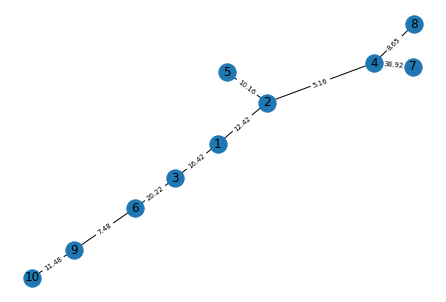

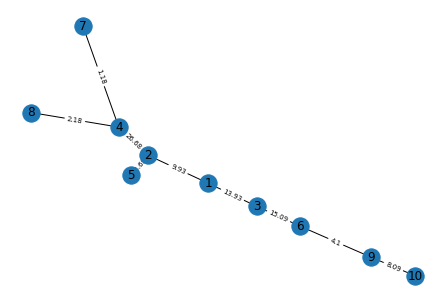

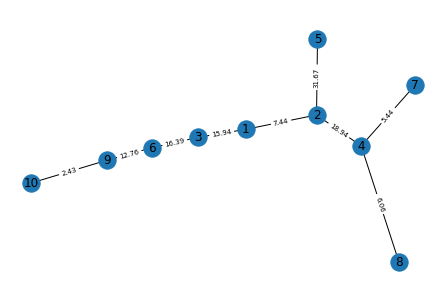

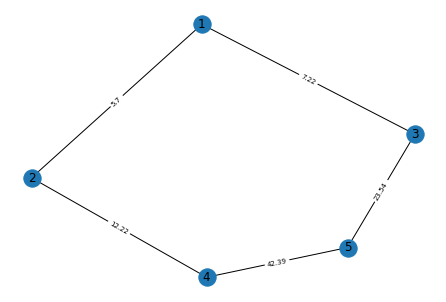

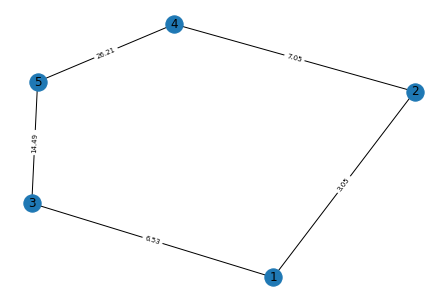

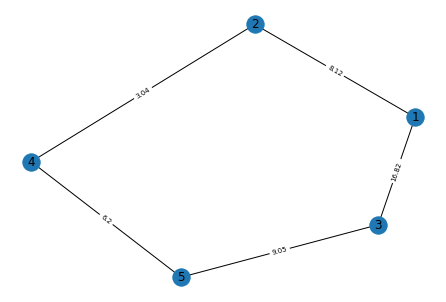

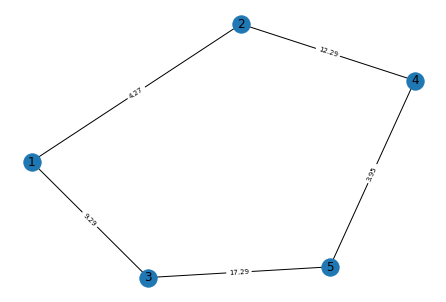

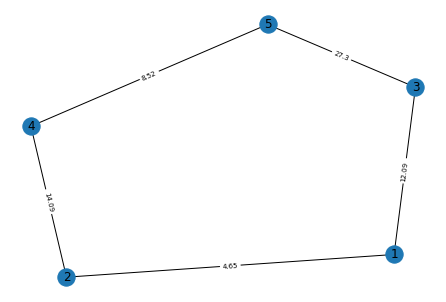

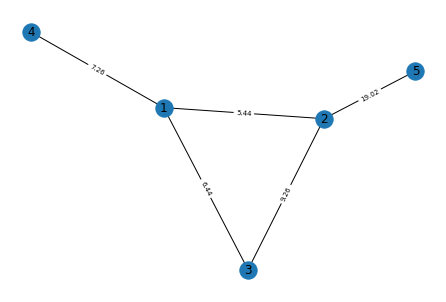

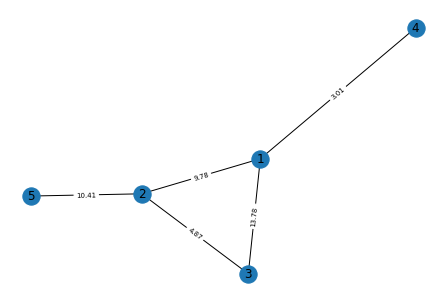

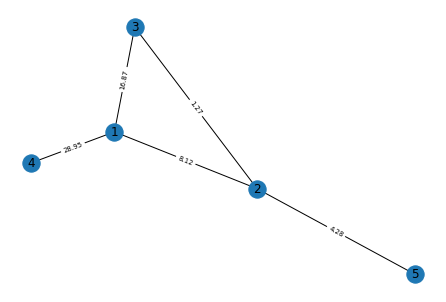

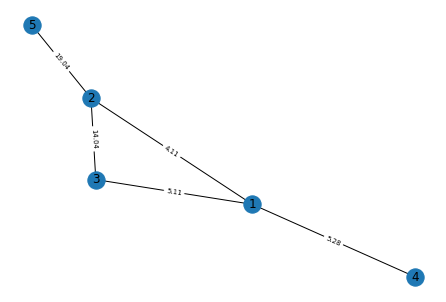

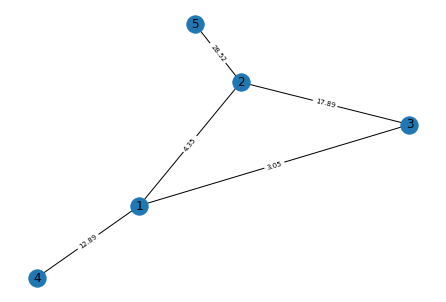

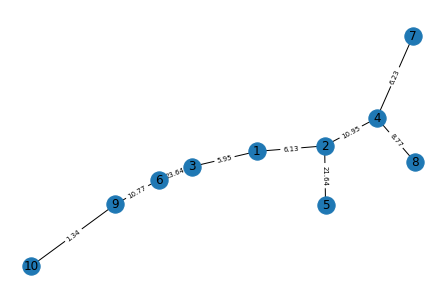

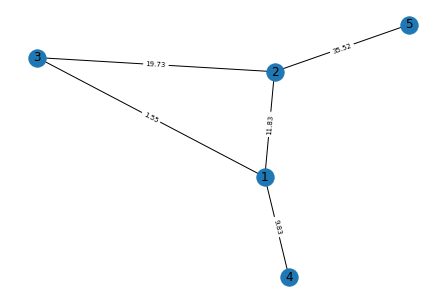

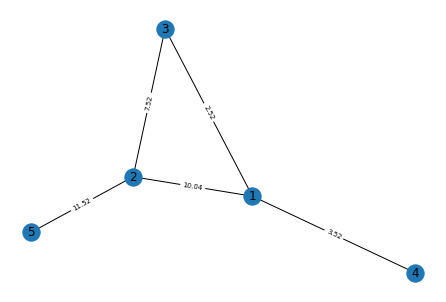

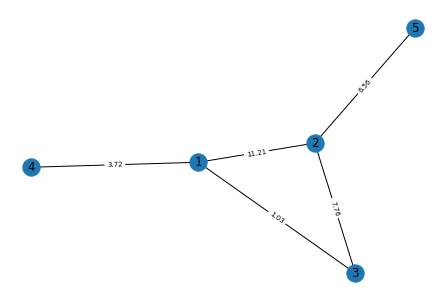

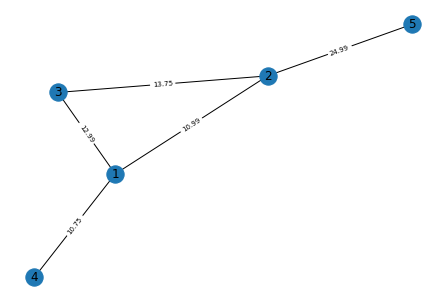

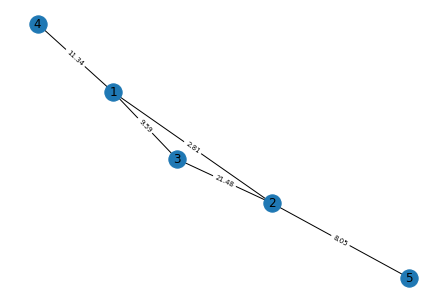

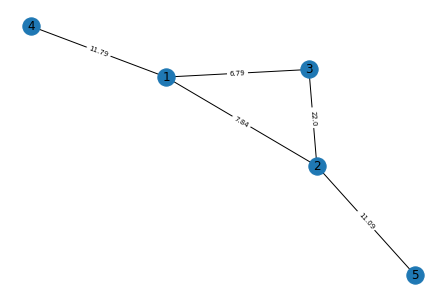

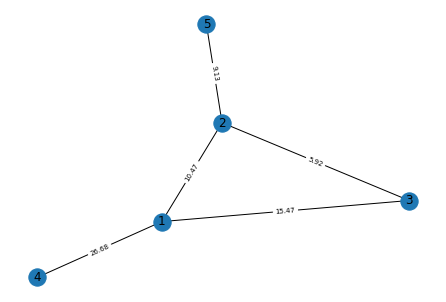

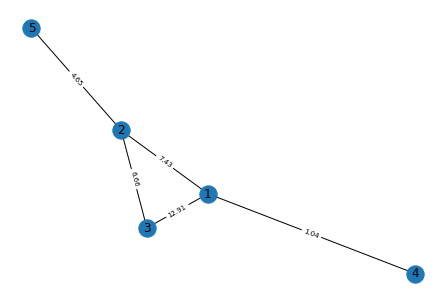

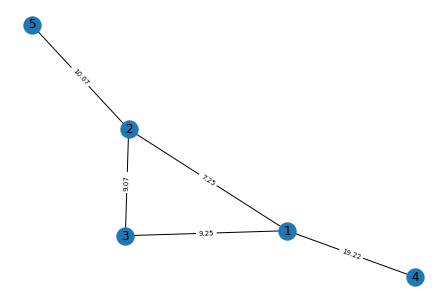

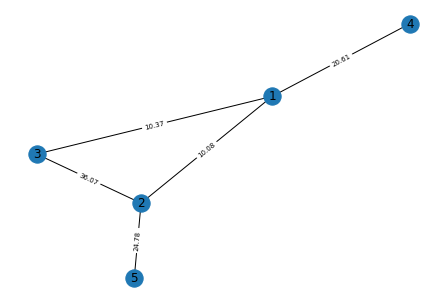

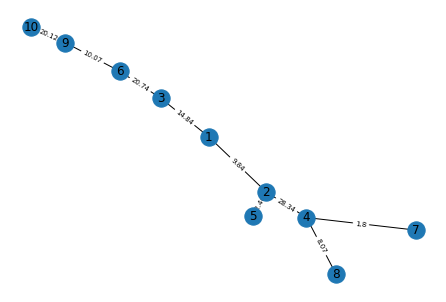

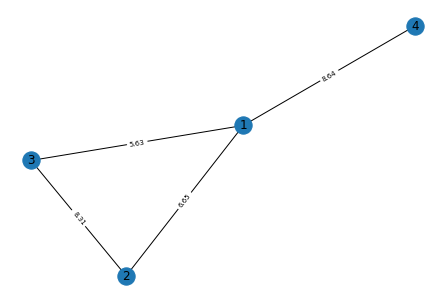

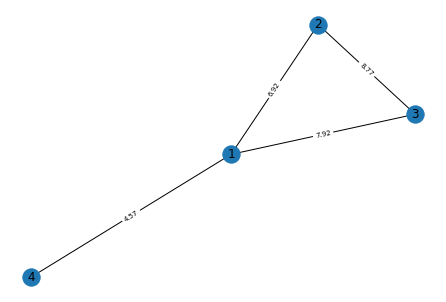

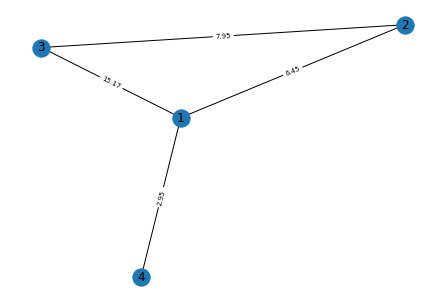

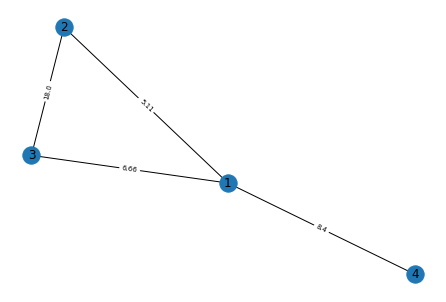

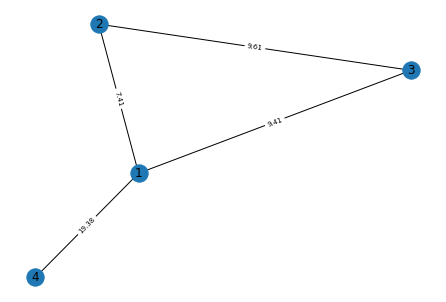

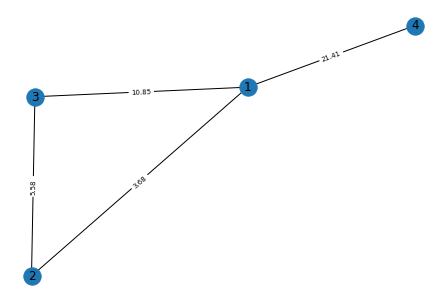

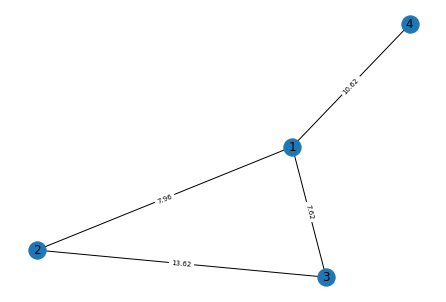

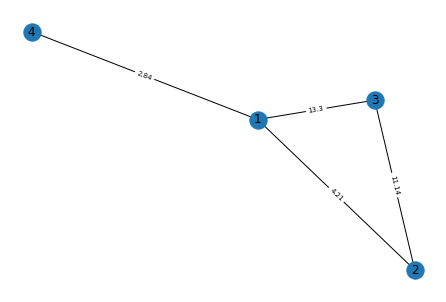

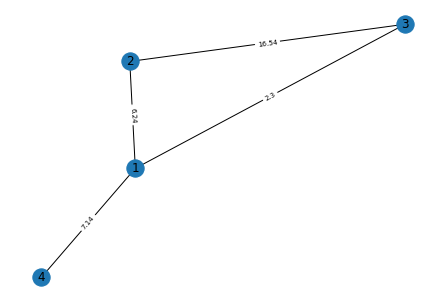

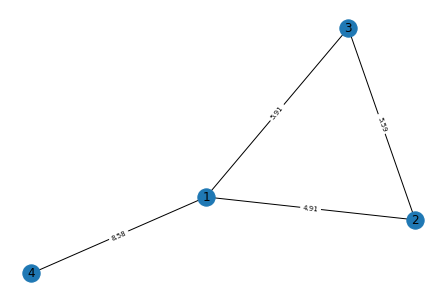

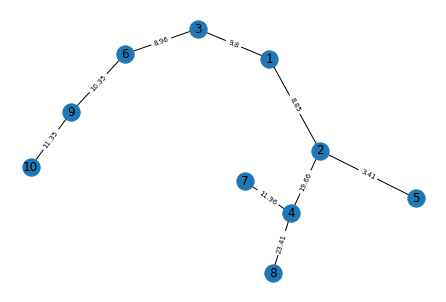

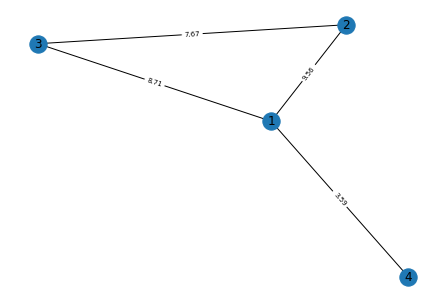

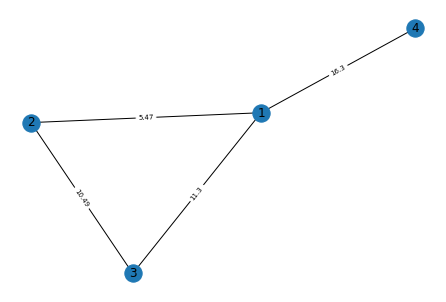

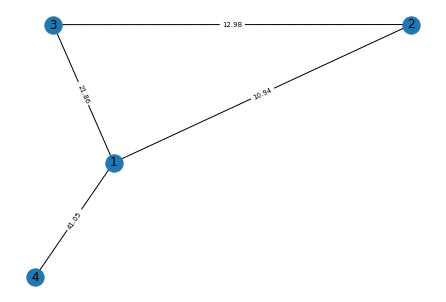

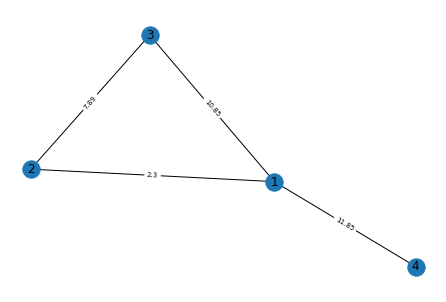

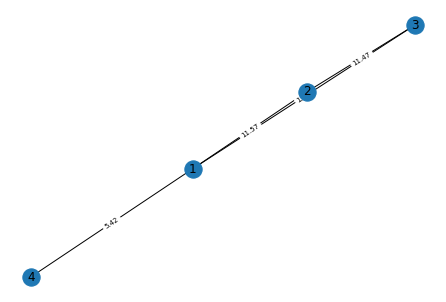

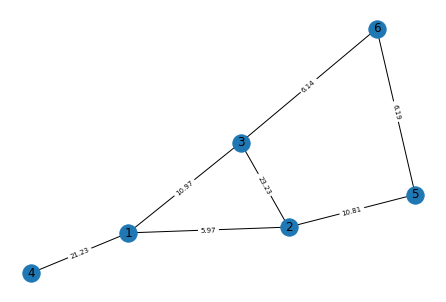

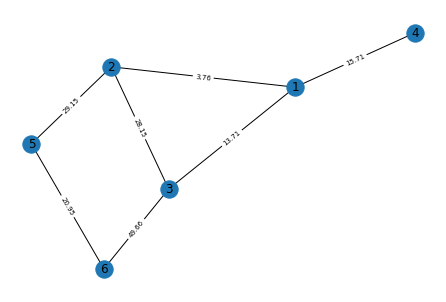

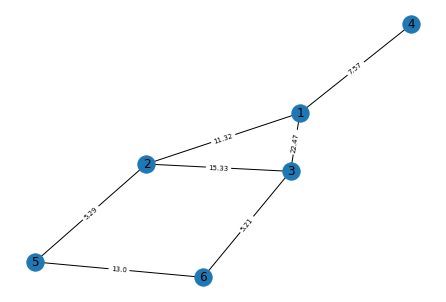

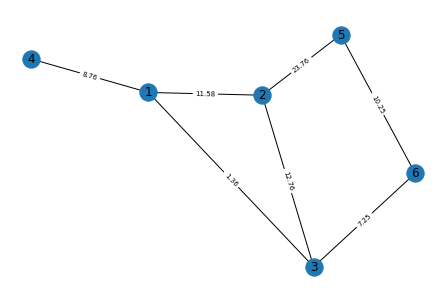

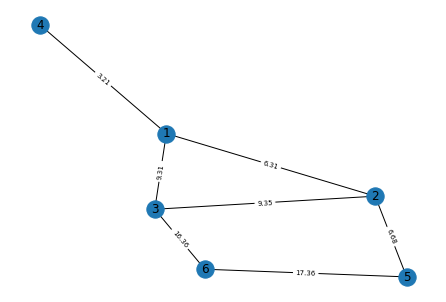

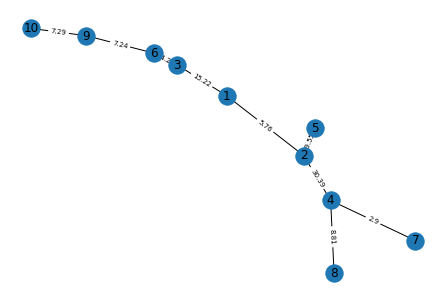

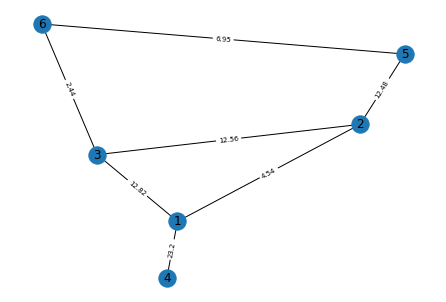

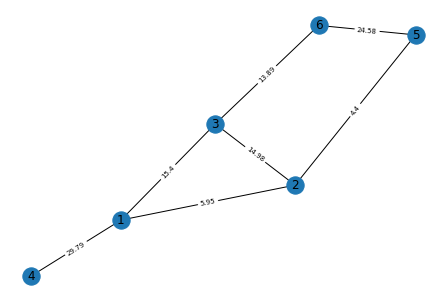

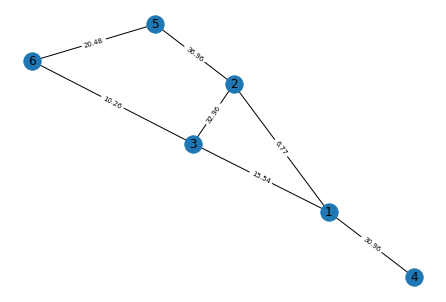

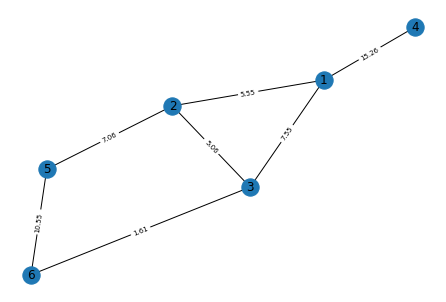

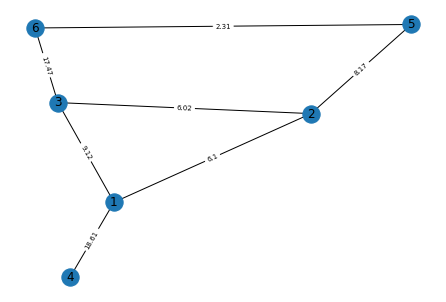

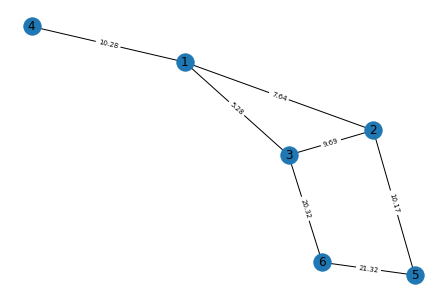

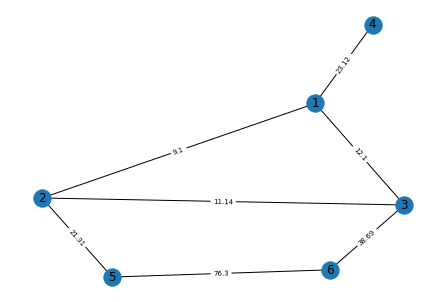

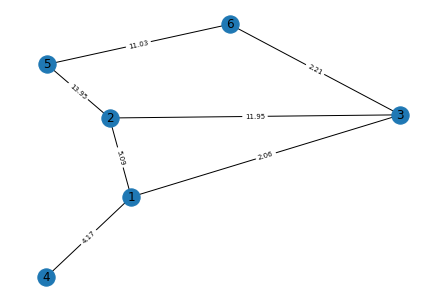

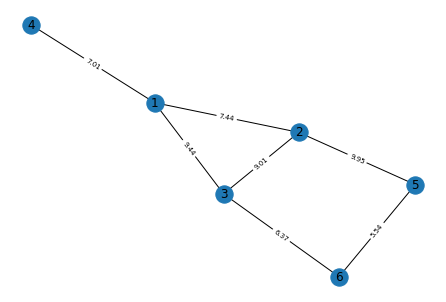

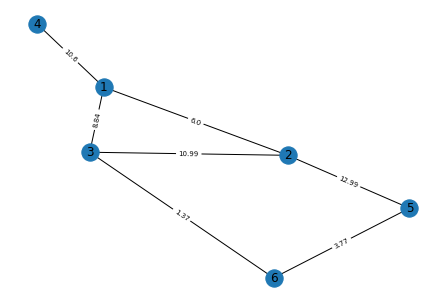

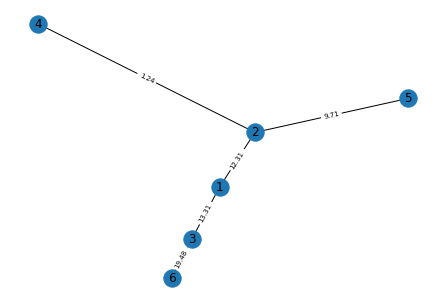

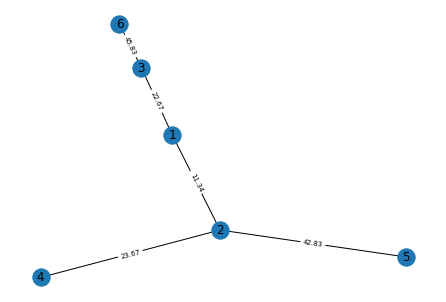

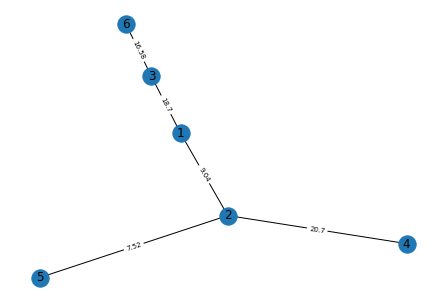

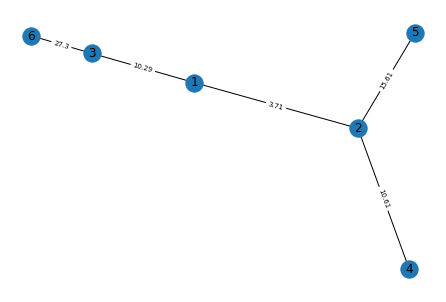

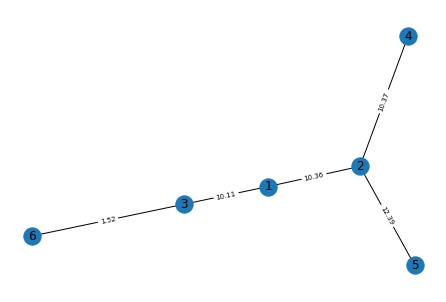

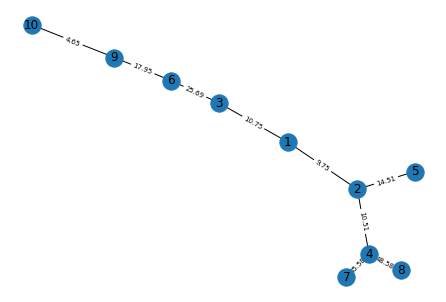

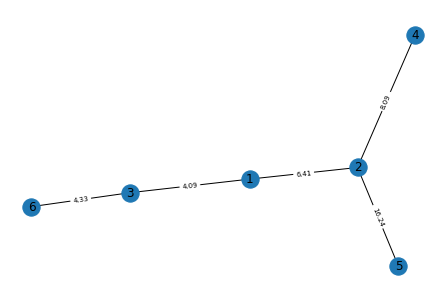

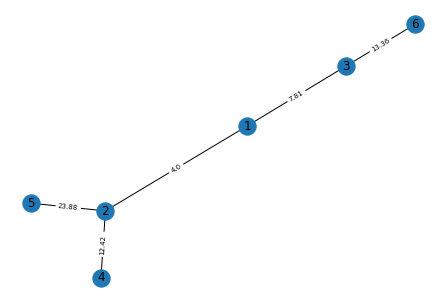

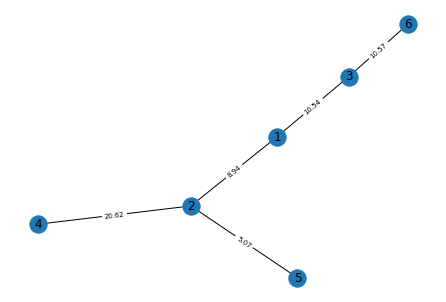

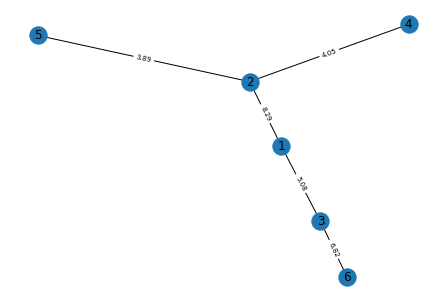

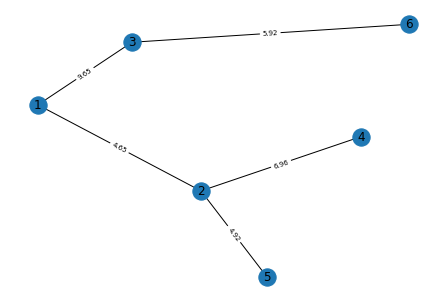

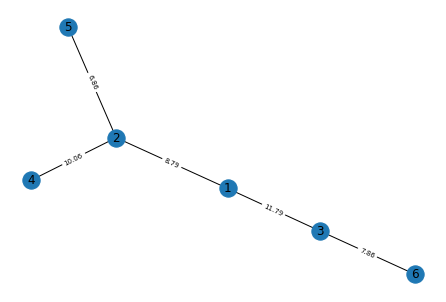

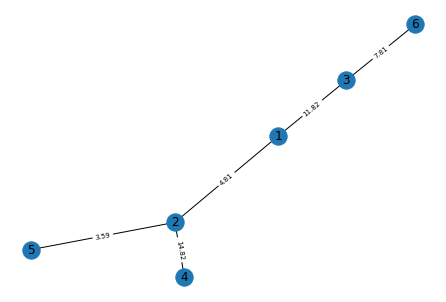

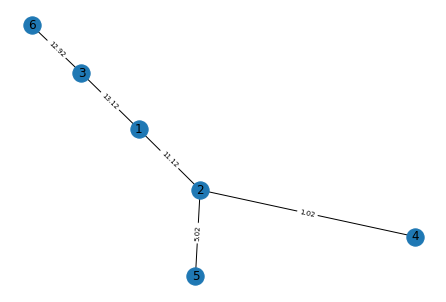

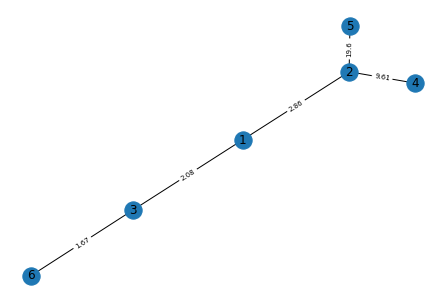

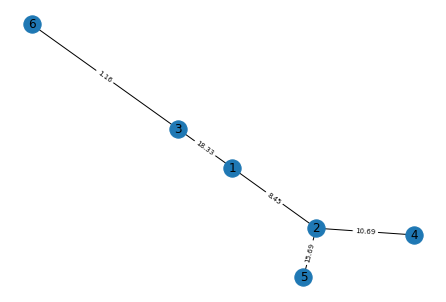

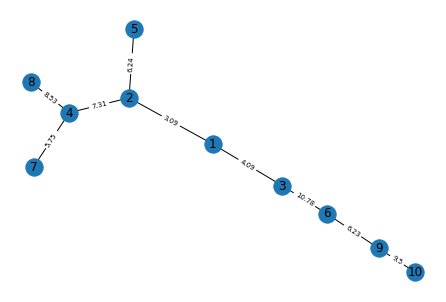

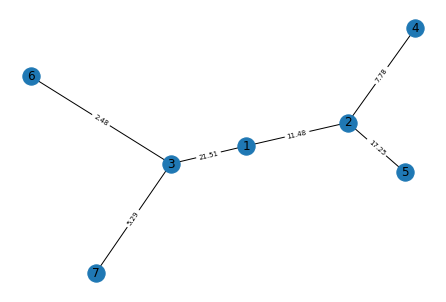

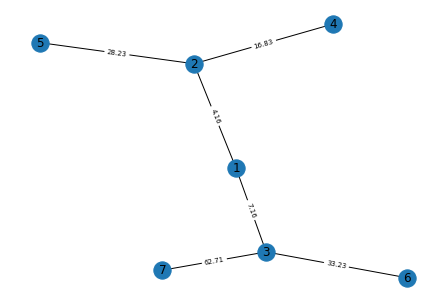

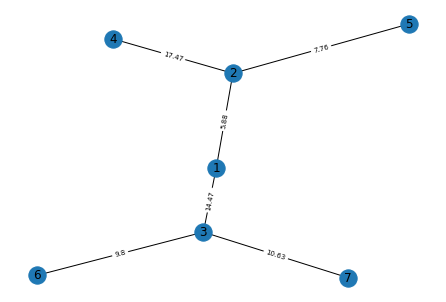

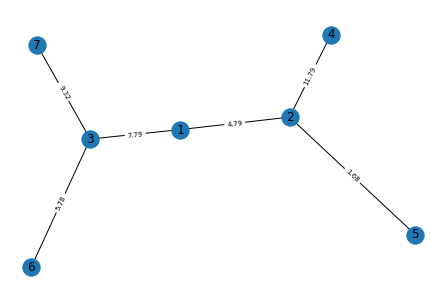

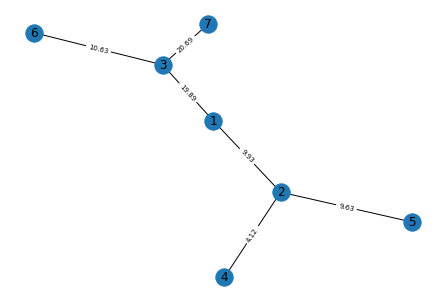

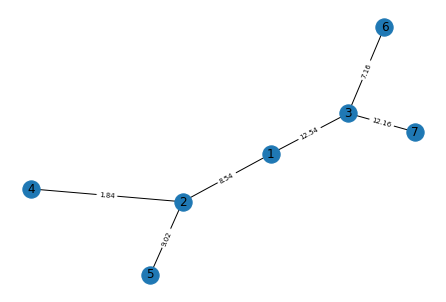

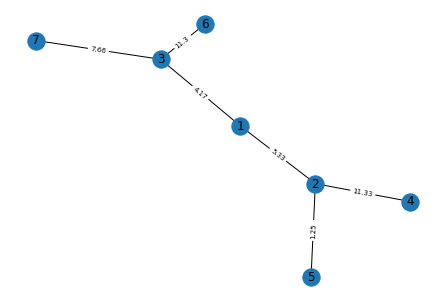

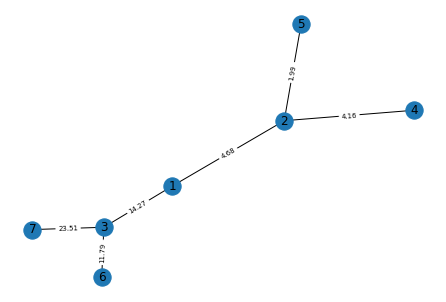

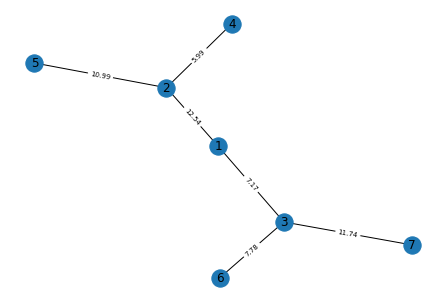

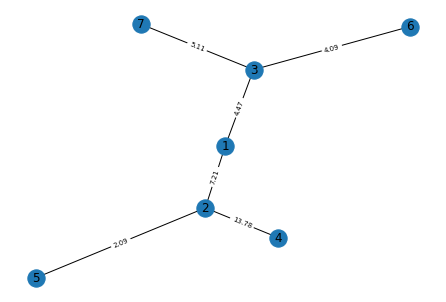

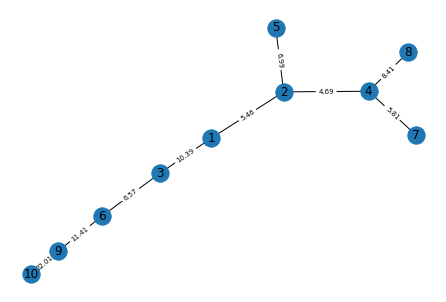

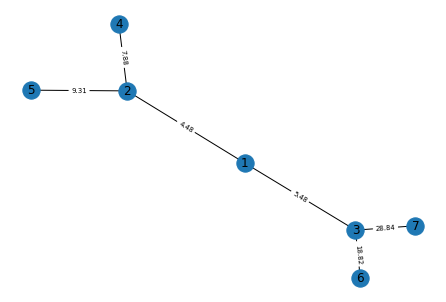

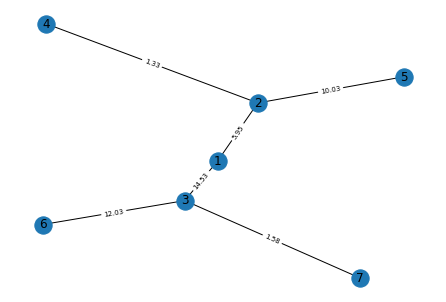

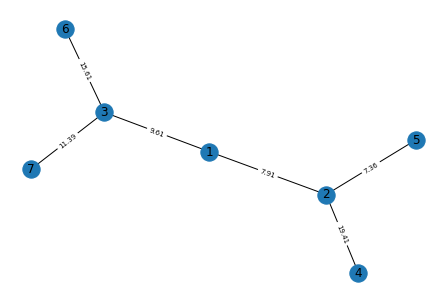

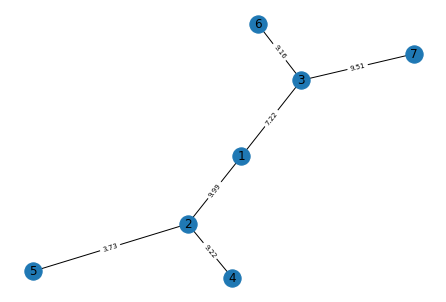

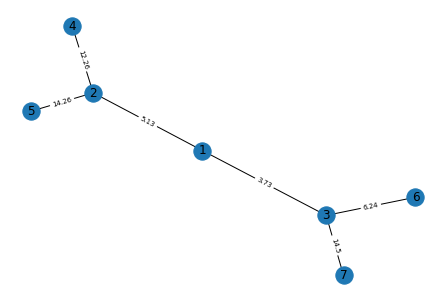

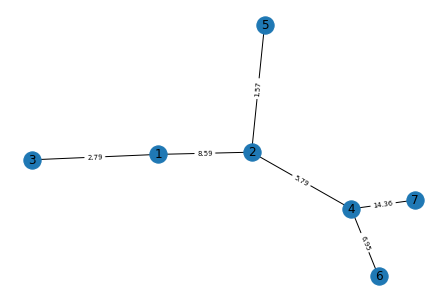

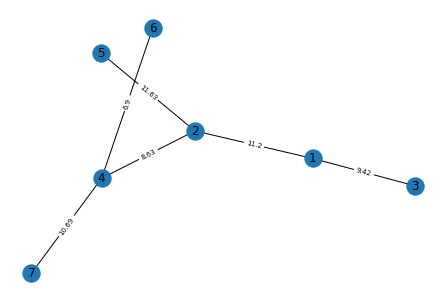

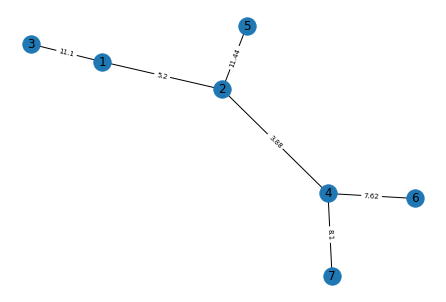

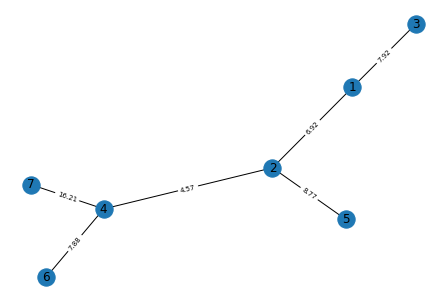

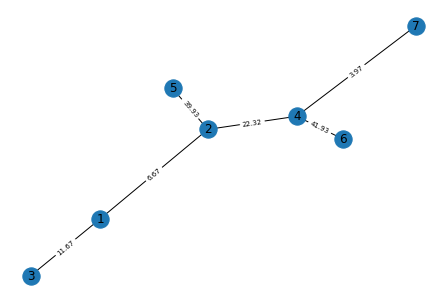

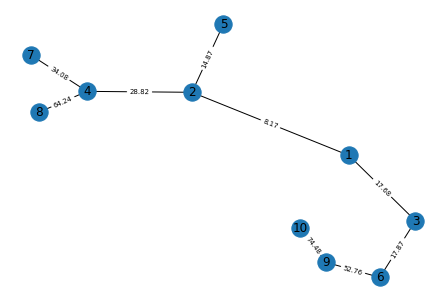

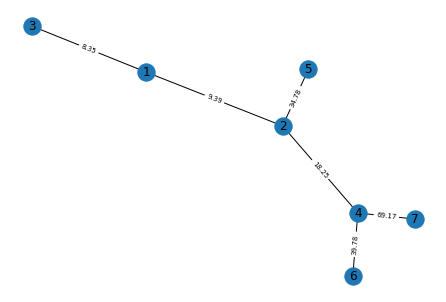

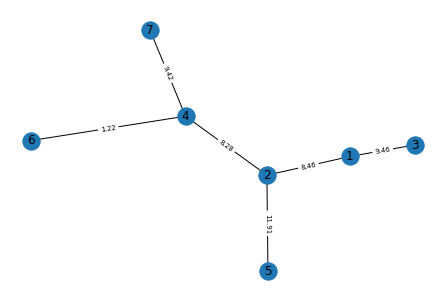

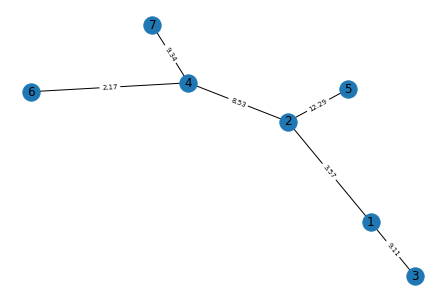

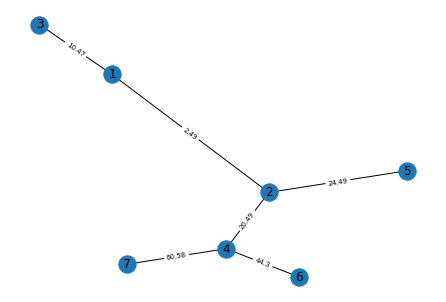

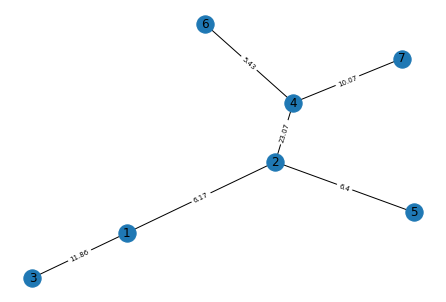

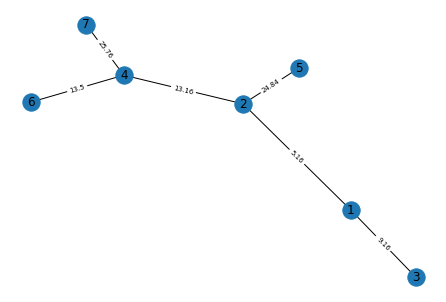

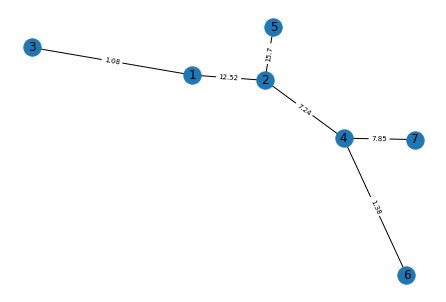

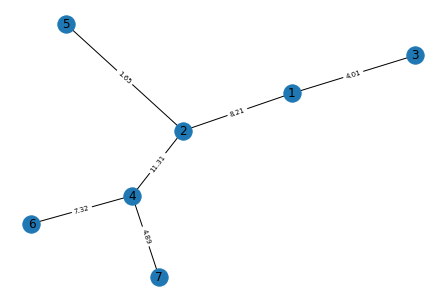

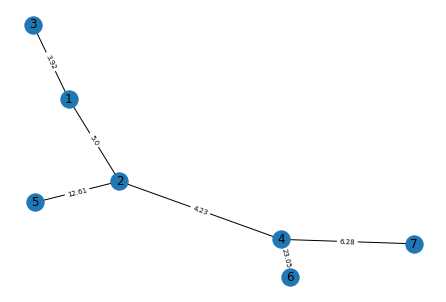

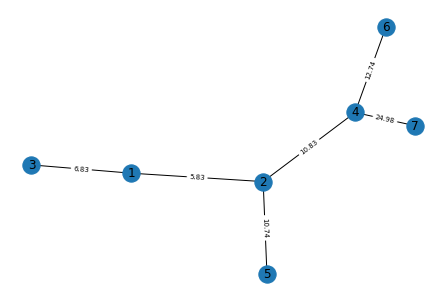

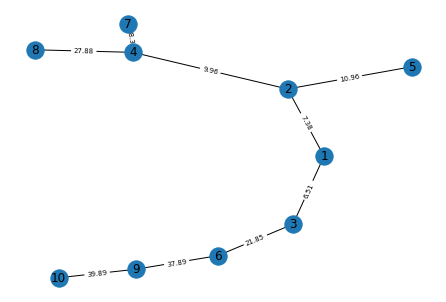

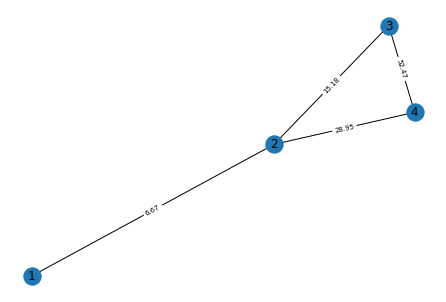

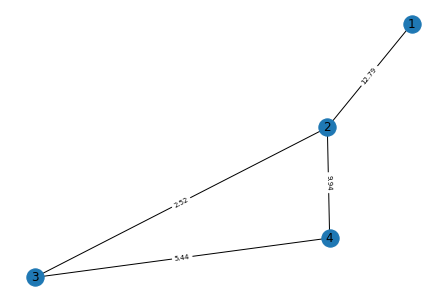

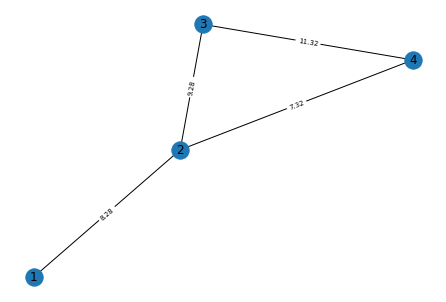

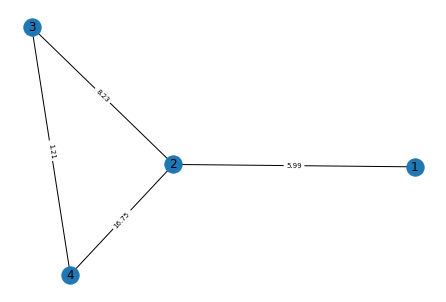

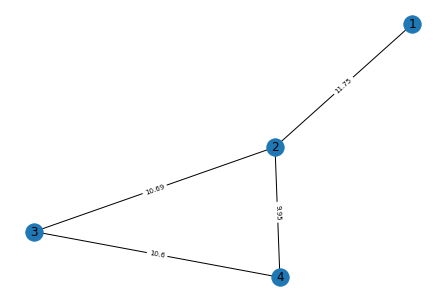

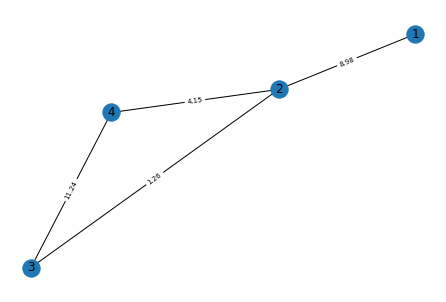

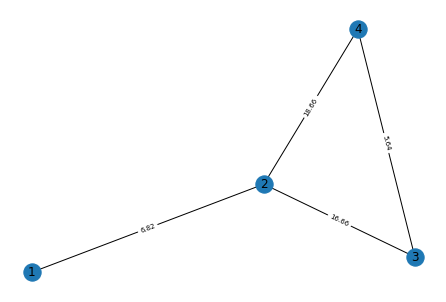

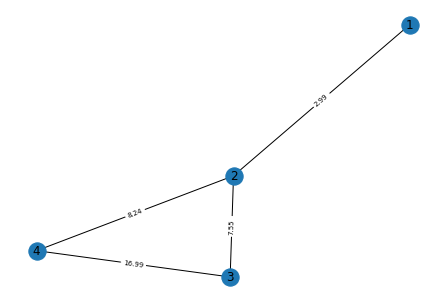

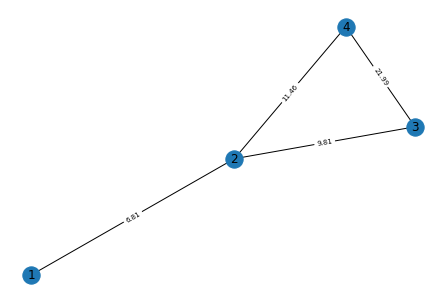

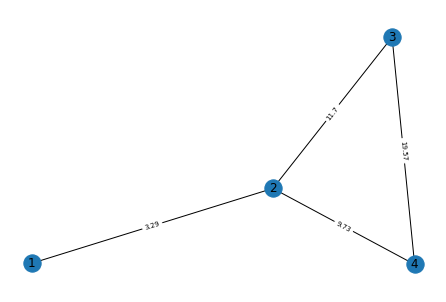

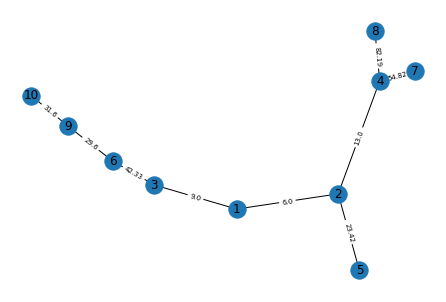

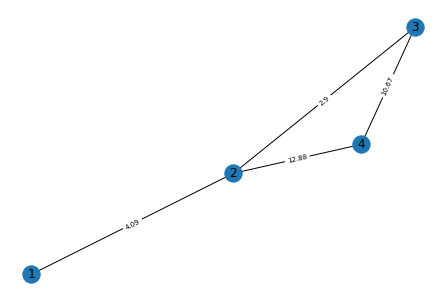

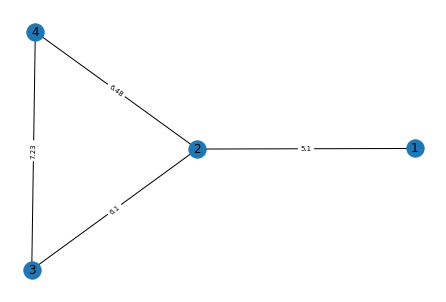

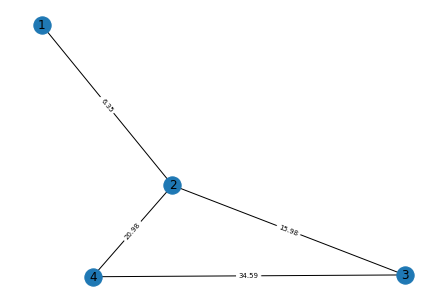

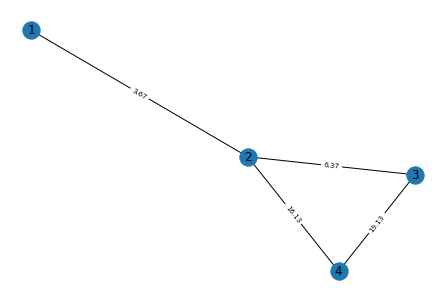

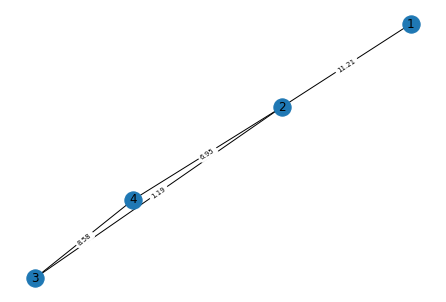

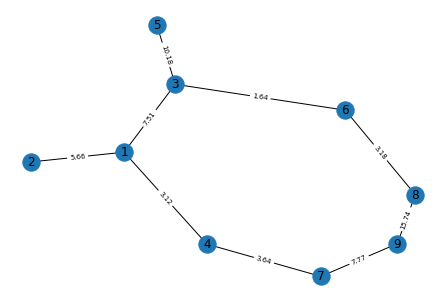

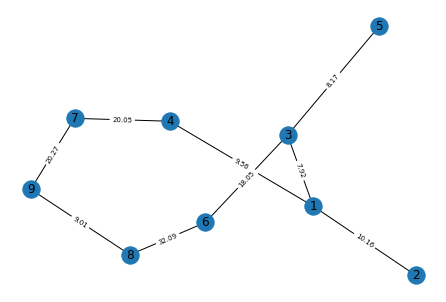

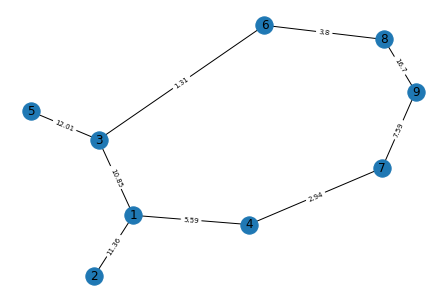

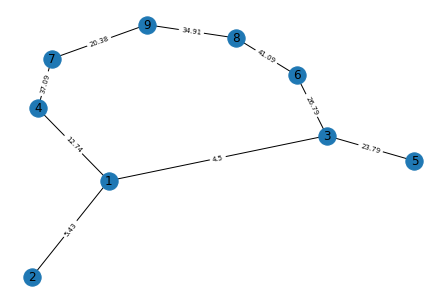

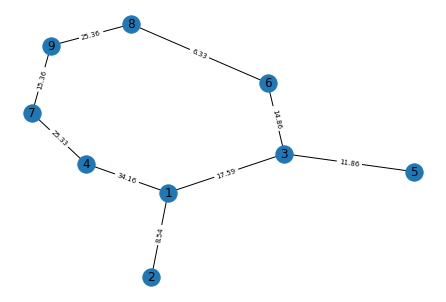

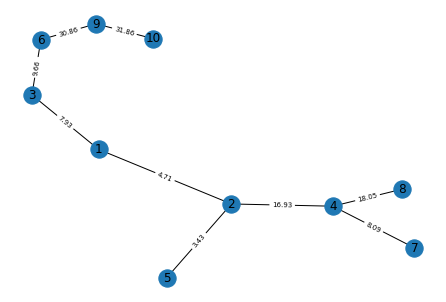

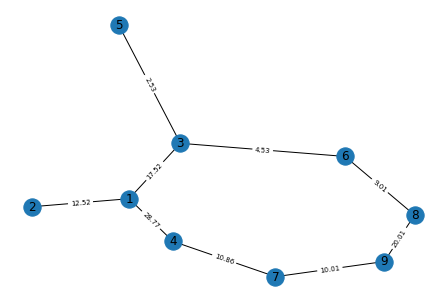

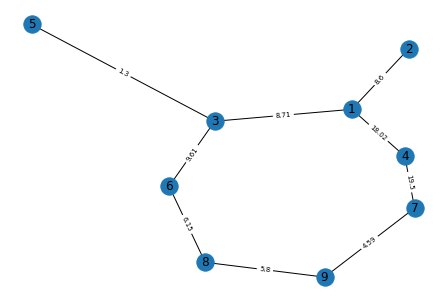

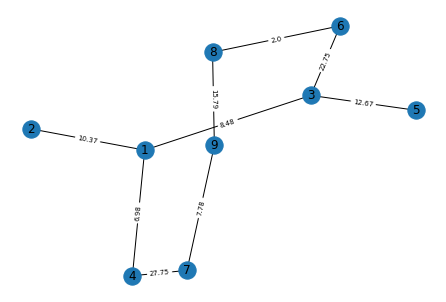

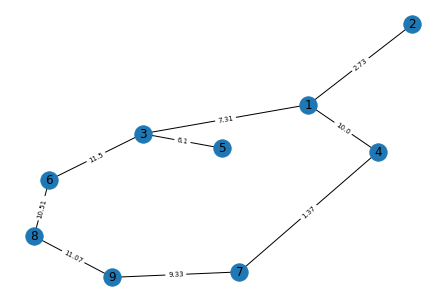

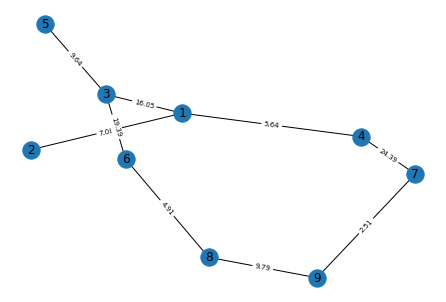

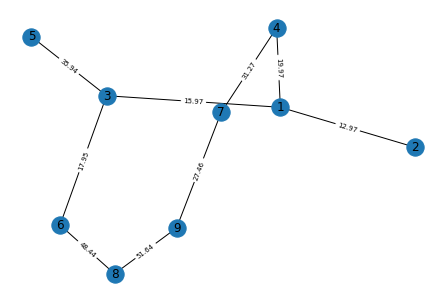

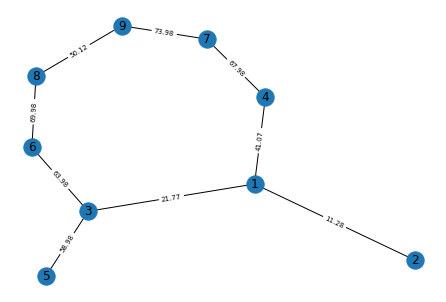

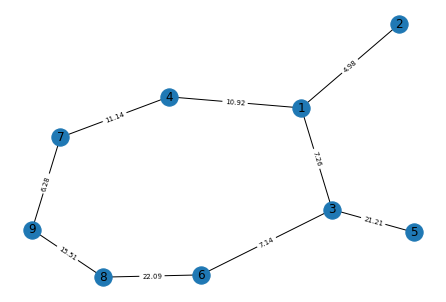

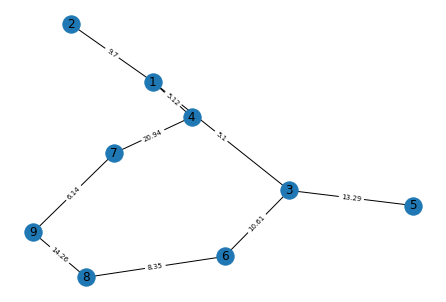

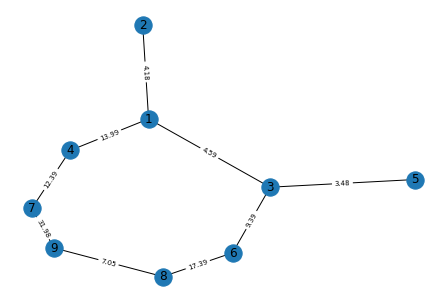

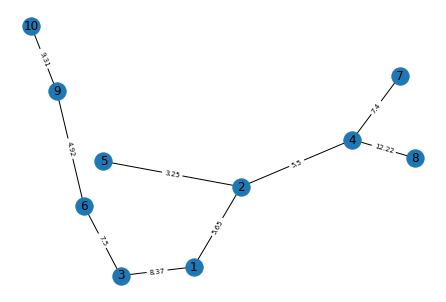

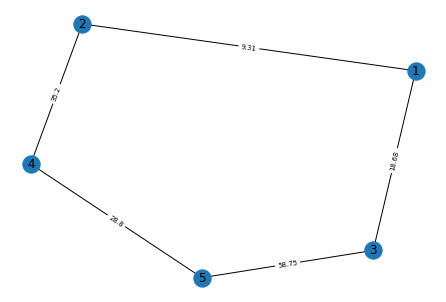

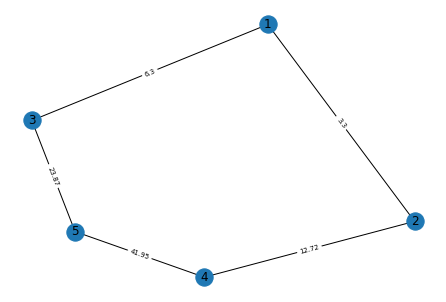

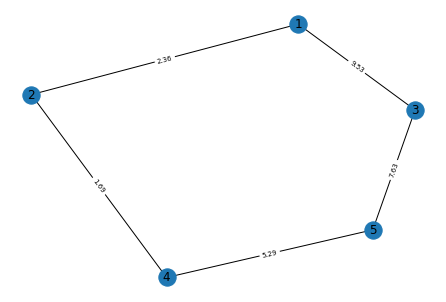

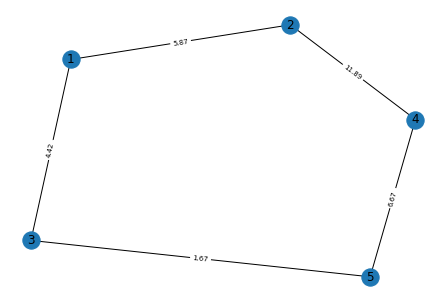

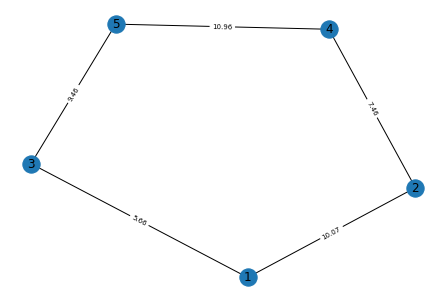

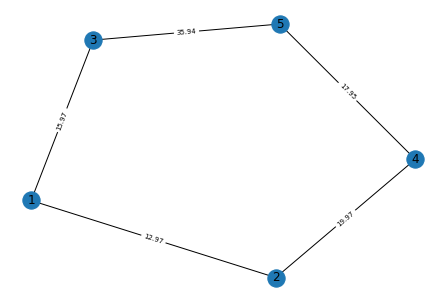

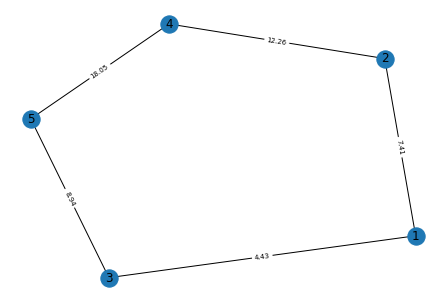

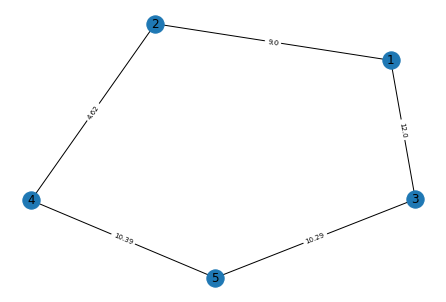

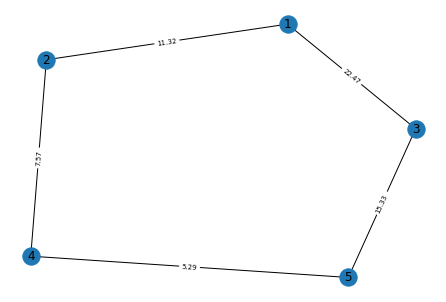

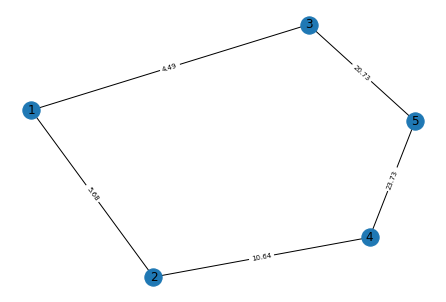

In [172]:
for index, graph in enumerate(graphs):
    plt.figure(index)
    G = nx.Graph()
    G.add_weighted_edges_from(graph)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=7)
    plt.savefig(savepath + filenames[index]+'.png')

In [147]:
savepath = 'dfs_image/'